In [1]:
import numpy as np
import clima_anom as ca
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
data_dir = '../data/Uwn_500hPa_Jan80_Dec19.nc'
data = ca.read_netcdf(data_dir,2)

lat : (73,)
level : (1,)
lon : (144,)
time : (480,)
uwnd : (480, 1, 73, 144)


In [3]:
lon = data['lon']-180
lat = data['lat']
uwn = data['uwnd'][:,0,:,:]

In [4]:
lon2d, lat2d = np.meshgrid(lon, lat)

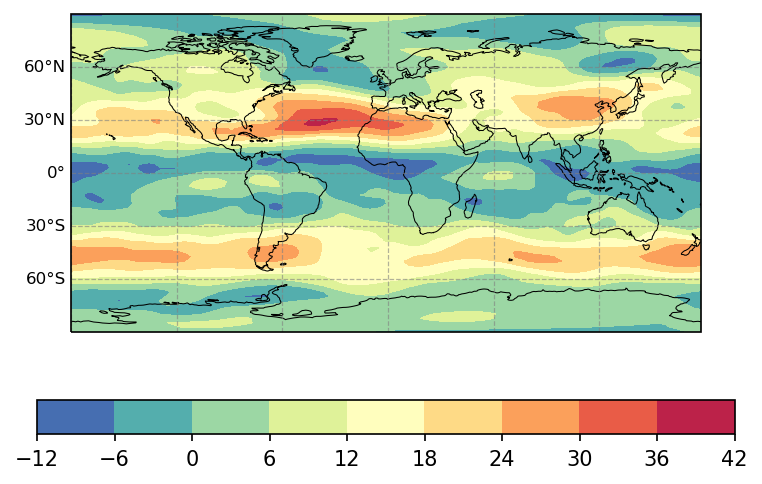

In [5]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

plt.figure(figsize=(6,4),dpi=150)
ax = plt.axes(projection=proj)
ax.coastlines(linewidth=0.5)

a1 = ax.contourf(lon2d, lat2d, uwn[0,:,:], cmap = cmap)
gl = ax.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}
plt.colorbar(a1,orientation="horizontal")

In [10]:
var_continent = ca.remove_continent_ocean(uwn,lon,lat,'continent')
var_ocen = ca.remove_continent_ocean(uwn,lon,lat,'ocean')

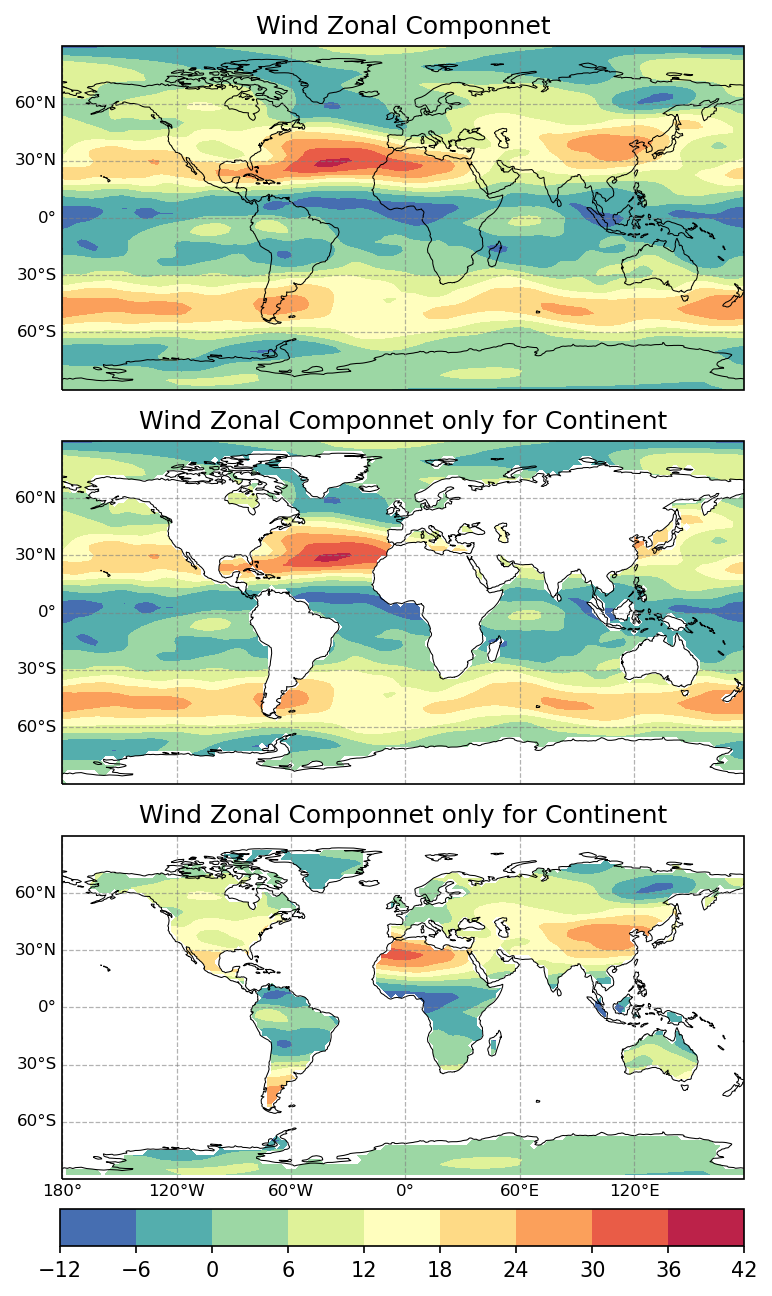

In [51]:
levels = np.arange(-12,48,6)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(10,10),dpi=150)
ax1 = plt.subplot(3,1,1, projection = proj)
ax2 = plt.subplot(3,1,2, projection = proj, sharex=ax1, sharey=ax1)
ax3 = plt.subplot(3,1,3, projection = proj, sharex=ax1, sharey=ax1)

ax1.coastlines(linewidth=0.5)
a1 = ax1.contourf(lon2d, lat2d, uwn[0,:,:],levels=levels,cmap=cmap)
ax1.title.set_text('Wind Zonal Componnet')
gl = ax1.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

ax2.coastlines(linewidth=0.5)
ax2.contourf(lon2d, lat2d, var_continent[0],levels=levels,cmap=cmap)
ax2.title.set_text('Wind Zonal Componnet only for Continent')
gl = ax2.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}

ax3.coastlines(linewidth=0.5)
ax3.contourf(lon2d, lat2d, var_ocen[0],levels=levels,cmap=cmap)
ax3.title.set_text('Wind Zonal Componnet only for Continent')
gl = ax3.gridlines(crs = proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 8, 'color': 'black'}
gl.ylabel_style = {'size': 8, 'color': 'black'}


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.15, wspace=0.05)

cbaxes = fig.add_axes([0.284, 0.08, 0.456, 0.025]) 
fig.colorbar(a1, cax = cbaxes,orientation="horizontal")

plt.savefig('../fig/Monthly_Seasonal.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)